In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/kaggle/kaggle.json

chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 24.1MB/s]
100% 163M/163M [00:08<00:00, 19.5MB/s]


In [5]:
from zipfile import ZipFile

dataset = '/content/face-mask-dataset.zip'


In [6]:
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The data is extracted')

The data is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask = os.listdir('/content/data/with_mask')

In [12]:
without_mask = os.listdir('/content/data/without_mask')

In [13]:
print(with_mask[0:5])
print(without_mask[0:5])

['with_mask_2788.jpg', 'with_mask_762.jpg', 'with_mask_212.jpg', 'with_mask_769.jpg', 'with_mask_503.jpg']
['without_mask_3070.jpg', 'without_mask_680.jpg', 'without_mask_2022.jpg', 'without_mask_2610.jpg', 'without_mask_3431.jpg']


In [14]:
print(len(with_mask))
print(len(without_mask))

3725
3828


In [15]:
# with mask --> 1
# without mask --> 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [16]:
labels = with_mask_labels + without_mask_labels

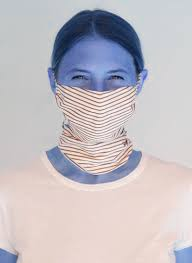

In [23]:
img1 = mpimg.imread('/content/data/with_mask/with_mask_2788.jpg')
cv2_imshow(img1)

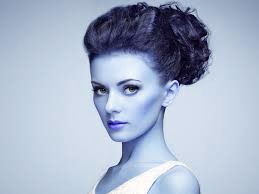

In [24]:
img2 = mpimg.imread('/content/data/without_mask/without_mask_3070.jpg')
cv2_imshow(img2)

In [29]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask:
  img = Image.open(with_mask_path + img_file)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)

  data.append(img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [30]:
without_mask_path = '/content/data/without_mask/'

for img_file in without_mask:
  img = Image.open(without_mask_path + img_file)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)

  data.append(img)

In [31]:
len(data)

7553

In [33]:
 X = np.array(data)
 Y = np.array(labels)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [36]:
X_train = X_train/255
X_test = X_test/255

In [37]:
# Building a CNN mdoel

import tensorflow as tf
from tensorflow import keras

In [40]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation= 'sigmoid'))

In [41]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])

In [42]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 23ms/step - loss: 0.4860 - acc: 0.8036 - val_loss: 0.2877 - val_acc: 0.8694
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2743 - acc: 0.8865 - val_loss: 0.2438 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2446 - acc: 0.9042 - val_loss: 0.2288 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2023 - acc: 0.9161 - val_loss: 0.2276 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1752 - acc: 0.9340 - val_loss: 0.2025 - val_acc: 0.9140


In [43]:
loss, acc = model.evaluate(X_test, Y_test)

48/48 [==============================] - 0s 9ms/step - loss: 0.1956 - acc: 0.9153


In [45]:
print('Loss: ', loss)
print('Accuracy: ', round(acc*100,2))

Loss:  0.1955670416355133
Accuracy:  91.53


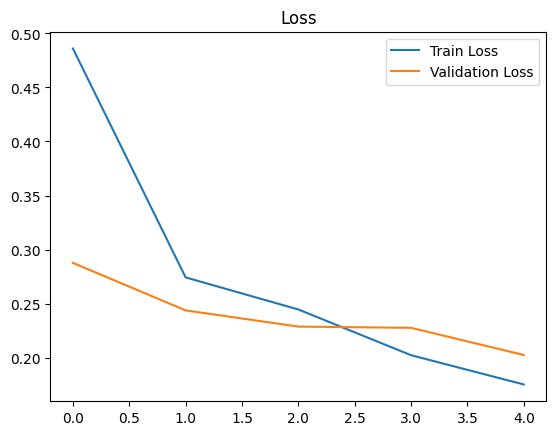

Text(0.5, 1.0, 'Accuracy')

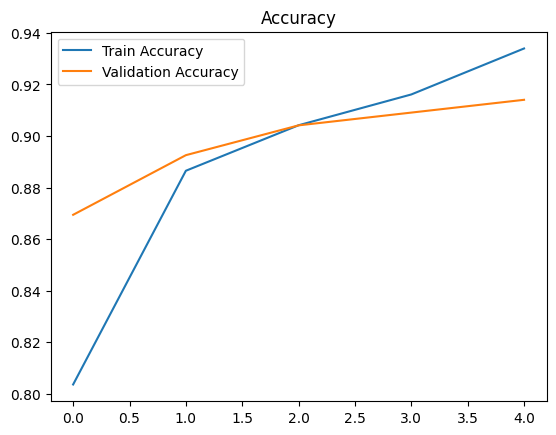

In [48]:
h = history

plt.plot(h.history['loss'], label= 'Train Loss')
plt.plot(h.history['val_loss'], label= 'Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(h.history['acc'], label= 'Train Accuracy')
plt.plot(h.history['val_acc'], label= 'Validation Accuracy')
plt.legend()
plt.title('Accuracy')


Give the image path: /content/data/with_mask/with_mask_1000.jpg


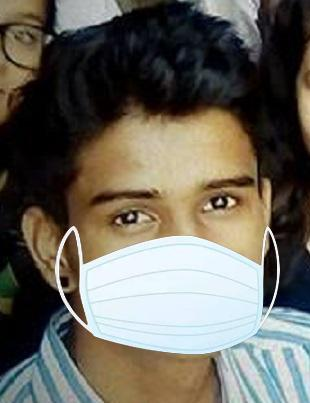

1/1 [==============================] - 0s 33ms/step
[[0.19082932 0.86580336]]
With MASK


In [52]:
path = input('Give the image path: ')

img = cv2.imread(path)

cv2_imshow(img)

img_resize = cv2.resize(img, (128,128))

img_scaled = img_resize/255

image_reshaped = np.reshape(img_scaled, [1,128,128,3])

prediction = model.predict(image_reshaped)

print(prediction)

index = np.argmax(prediction)

if(index==1):
  print('With MASK')
else:
  print('Without MASK')